In [8]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [2]:
#load data
df = pd.read_csv('Wine-quality-challenge.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#normal distribution

In [4]:
#density plot of chlorides


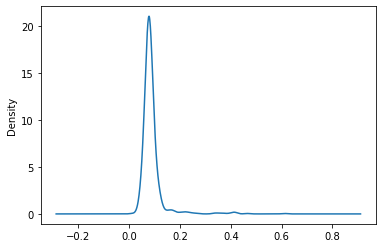

In [5]:
df['chlorides'].plot.density()

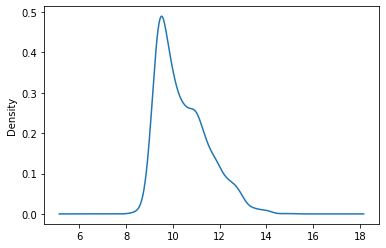

In [6]:
#find what is the share of observations within 3 standard devations of alcohol
df['alcohol'].plot.density()

In [7]:
df[(df.alcohol<=df.alcohol.mean()+3*df.alcohol.std()) &
       (df.alcohol>=df.alcohol.mean()-3*df.alcohol.std()) ].alcohol.count()/df.alcohol.count()

0.9949968730456535

In [8]:
df.loc[df.alcohol==9.4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,6.2,0.580,0.00,1.6,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,5
1421,7.5,0.400,0.18,1.6,0.079,24.0,58.0,0.99650,3.34,0.58,9.4,5
1501,7.8,0.820,0.29,4.3,0.083,21.0,64.0,0.99642,3.16,0.53,9.4,5
1551,7.1,0.670,0.00,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5


#shaipiro-wilks test
how likely it is taht the data was drawn from a gaussian distribution


In [9]:
#test for normality
stat, p =st.shapiro(df.chlorides)

p-value : the probability of accepting H0 

In [10]:
p

0.0

In [11]:
if p>0.05:
  print('sample looks Gaussian/normal (fail to reject H0)')
else:
  print('sample doesnt look gaussian/normal (reject H0)')

sample doesnt look gaussian/normal (reject H0)


In [12]:
#test for sulphates
stat, p = st.shapiro(df.sulphates)

In [13]:
p

5.821617678881608e-38

In [14]:
if p>0.05:
  print('sample looks Gaussian/normal (fail to reject H0)')
else:
  print('sample doesnt look gaussian/normal (reject H0)')

sample doesnt look gaussian/normal (reject H0)


#standard error
the standard error of the sample mean is an estimate of how far the sample mean is likely to be from the population mean.
standard deviation is the degree to which individuals within teh sample differ from the sample mean.
SE = standard deviation/sqrt(n)

In [15]:
#using function
st.sem(df.alcohol)

0.026650018979018173

In [16]:
#standard deviations divided by square root of observations
df.alcohol.std()/m.sqrt(df.alcohol.count())

0.026650018979018173

In [17]:
st.sem(df.pH)

0.0038608683325203784

#Z-score
how far from teh mean is a data point.
it is a way to compare results to a normal poplation

#confidence interval

In [18]:
print(df['citric acid'].mean())
st.norm.interval(alpha=0.95, 
                 loc=df['citric acid'].mean(),
                 scale= st.sem(df['citric acid']))

0.2709756097560976


(0.2614275451830121, 0.28052367432918307)

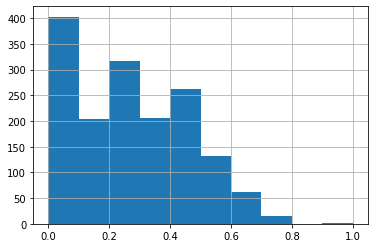

In [19]:
df['citric acid'].hist()

In [20]:
print(df.density.mean())
st.norm.interval(alpha=0.95,
                 loc=df.density.mean(),
                 scale=st.sem(df['density']))

0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

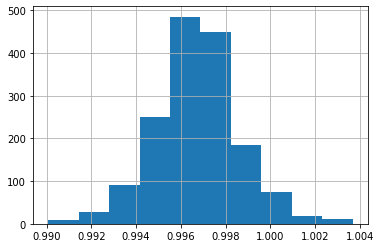

In [21]:
df.density.hist()

#T-test
A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [9]:
#load data
data = pd.read_csv('stackoverflow.csv')

In [10]:
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
salary_uk = data.loc[data.Country=='United Kingdom'].Salary
salary_de = data.loc[data.Country=='Germany'].Salary

In [12]:
#T-test
stat, p = st.ttest_ind(salary_de,salary_uk)

In [13]:
if p>0.05:
  print('both countries have similar salaries (fail to reject H0)')
else:
  print('There is a difference in salaries (reject H0)')


There is a difference in salaries (reject H0)


In [14]:
exprience_india = data.loc[data.Country=='India'].YearsCodedJob
exprience_USA = data.loc[data.Country=='United States'].YearsCodedJob

In [15]:
stat, p = st.ttest_ind(exprience_india, exprience_USA)
p

5.225676347614714e-58

In [16]:
if p>0.05:
  print('both countries have similar experience (fail to reject H0)')
else:
  print('There is a difference in  experience (reject H0)')


There is a difference in  experience (reject H0)


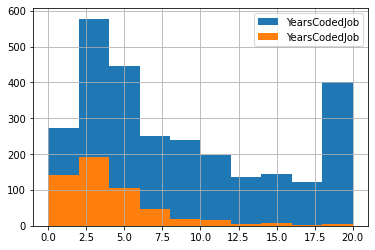

In [17]:
exprience_USA.hist(legend=True)
exprience_india.hist(legend=True)

#chi-square test
A chi-square test is a statistical test used to compare observed results with expected results.
it requires  for categorical variables.

In [19]:
#cross tabulation 
tab = pd.crosstab(index = data.Country, columns=data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [42]:
#other way for crosstab
pd.get_dummies(data=data, columns=['Remote'], prefix='Remote').groupby('Country').sum()[['Remote_Not remote','Remote_Remote']]

,Remote_Not remote,Remote_Remote
Country,,
Canada,457.0,28.0
Germany,717.0,40.0
India,482.0,56.0
United Kingdom,953.0,70.0
United States,2410.0,381.0


In [44]:
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)

3.321120877301216e-16


In [45]:
if p>0.05:
  print('there is no relationship (fail to reject H0)')
else:
  print('There is a strong relationship (reject H0)')


There is a strong relationship (reject H0)


In [46]:
tab = pd.crosstab(index = data.CompanySizeNumber, columns=data.Hobby)
tab

Hobby,0,1
CompanySizeNumber,,
1,101,311
10,123,400
20,293,961
100,245,918
500,91,309
1000,180,436
5000,60,192
10000,243,731


In [47]:
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)

0.025708455559671047


In [48]:
if p>0.05:
  print('there is no relationship (fail to reject H0)')
else:
  print('There is a strong relationship (reject H0)')


There is a strong relationship (reject H0)
